In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [4]:
sex_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
sex_name = ["Female", "Male"]
sex_df.columns = sex_name

In [5]:
def one_hot_encode(x:np.ndarray):
    uni = np.unique(x)
    print(uni)
    result = np.zeros((len(x), len(uni)))
    for i in range(len(x)):
        for j in range(len(uni)):
            if x[i] == uni[j]:
                result[i][j] = 1;
                
    return result

In [6]:
race_arr = pd.DataFrame(df['Race']).to_numpy()
one_hot_race = one_hot_encode(race_arr)
race_df = pd.DataFrame(one_hot_race, columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White'])
diabetic_arr = pd.DataFrame(df['Diabetic']).to_numpy()
one_hot_diabetic = one_hot_encode(diabetic_arr)
diabetic_df = pd.DataFrame(one_hot_diabetic, columns = ['Diabetic(No)', 'Diabetic(No, borderline diabetes)', 'Diabetic(Yes)', 'Diabetic(Yes, during pregnancy)'])
gen_health_arr = pd.DataFrame(df['GenHealth']).to_numpy()
one_hot_gen_health = one_hot_encode(gen_health_arr)
gen_health_df = pd.DataFrame(one_hot_gen_health, columns = ['GenHealth(Excellent)', 'GenHealth(Fair)', 'GenHealth(Good)', 'GenHealth(Poor)', 'GenHealth(Very good)'])
df = df.drop(['Sex', 'Race', 'GenHealth', 'Diabetic', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


In [7]:
df['Smoking'] = df['Smoking'].map(
                   {'Yes':1 ,'No':0})
df['HeartDisease'] = df['HeartDisease'].map(
                   {'Yes':1 ,'No':0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(
                   {'Yes':1 ,'No':0})
df['Stroke'] = df['Stroke'].map(
                   {'Yes':1 ,'No':0})
df['DiffWalking'] = df['DiffWalking'].map(
                   {'Yes':1 ,'No':0})
df['PhysicalActivity'] = df['PhysicalActivity'].map(
                   {'Yes':1 ,'No':0})
df['Asthma'] = df['Asthma'].map(
                   {'Yes':1 ,'No':0})
df['KidneyDisease'] = df['KidneyDisease'].map(
                   {'Yes':1 ,'No':0})
df['SkinCancer'] = df['SkinCancer'].map(
                   {'Yes':1 ,'No':0})

In [8]:
df = pd.concat([df, sex_df], axis=1, join='inner')
df = pd.concat([df, race_df], axis=1, join='inner')
df = pd.concat([df, diabetic_df], axis=1, join='inner')
df = pd.concat([df, gen_health_df], axis=1, join='inner')

In [9]:
# read file
original_df = pd.read_csv('heart_2020_cleaned.csv')

In [10]:
#replace the range with the first number
original_df['AgeCategory'] = original_df['AgeCategory'].replace(['80 or older'],'80-')
original_df['AgeCategory'] = original_df['AgeCategory'].str.split('-').str[0].astype('float64')

In [11]:
# process numeric features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime
numeric_features = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']
scaler = StandardScaler()
original_df[numeric_features] = scaler.fit_transform(original_df[numeric_features])

In [12]:
original_df = original_df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
                                'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [13]:
original_df = pd.concat([original_df, df], axis=1, join='inner')

In [14]:
result_df = original_df

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
result_df = result_df.drop(['Diabetic(No, borderline diabetes)', 'Diabetic(Yes, during pregnancy)'], axis=1)
result_df = result_df.drop(['Asian','Black','Hispanic','Other','White'], axis = 1)

# SVM

In [34]:
from cuml import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report

In [35]:
split_data = []
for i in range(3):
    split_data.append(result_df.sample(result_df.shape[0]//3, replace = False, random_state = 42))

In [36]:
svm_df = split_data[2]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(svm_df.drop(columns = "HeartDisease"), svm_df["HeartDisease"].astype(int), test_size=0.2, random_state=42)

## Raw SVM

In [38]:
space = {"kernel":['linear', 'poly', 'rbf', 'sigmoid'],
         "C":[1, 10]}
kf = KFold(n_splits=3)
svm = SVC(cache_size = 4096)

In [39]:
grid = GridSearchCV(svm, space, cv=kf, scoring="f1", verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ................C=1, kernel=linear;, score=0.033 total time=  11.8s
[CV 2/3] END ................C=1, kernel=linear;, score=0.039 total time=  11.3s
[CV 3/3] END ................C=1, kernel=linear;, score=0.039 total time=  10.9s
[CV 1/3] END ..................C=1, kernel=poly;, score=0.033 total time=  11.7s
[CV 2/3] END ..................C=1, kernel=poly;, score=0.039 total time=  11.3s
[CV 3/3] END ..................C=1, kernel=poly;, score=0.039 total time=  11.0s
[CV 1/3] END ...................C=1, kernel=rbf;, score=0.033 total time=  11.7s
[CV 2/3] END ...................C=1, kernel=rbf;, score=0.039 total time=  11.3s
[CV 3/3] END ...................C=1, kernel=rbf;, score=0.039 total time=  10.9s
[CV 1/3] END ...............C=1, kernel=sigmoid;, score=0.033 total time=  11.7s
[CV 2/3] END ...............C=1, kernel=sigmoid;, score=0.039 total time=  11.3s
[CV 3/3] END ...............C=1, kernel=sigmoid;,

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=3)

In [62]:
svm_best = grid.best_estimator_
grid.best_params_

{'C': 10, 'kernel': 'linear'}

In [63]:
y_pred = svm_best.predict(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.0
0.9132270168855535


In [64]:
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     19470
           1       0.00      0.00      0.00      1850

    accuracy                           0.91     21320
   macro avg       0.46      0.50      0.48     21320
weighted avg       0.83      0.91      0.87     21320



/home/inktea0920/miniconda3/envs/rapids-22.04/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/inktea0920/miniconda3/envs/rapids-22.04/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/inktea0920/miniconda3/envs/rapids-22.04/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

## PCA SVM

In [65]:
from sklearn.decomposition import PCA

In [66]:
train_len = len(result_df)*0.8
train_len = int(train_len)

all_train = result_df.iloc[:train_len, :]
all_test = result_df.iloc[train_len:, :]

pca_train = PCA(n_components=all_train.shape[1])
pca_train.fit(all_train)
pca_test = PCA(n_components=all_test.shape[1])
pca_test.fit(all_test)

pca_train_df = pd.DataFrame(pca_train.transform(all_train), columns=all_train.columns, index=all_train.index)
pca_test_df = pd.DataFrame(pca_test.transform(all_test), columns=all_test.columns, index=all_test.index)

X_train = pca_train_df.drop(columns = "HeartDisease")
y_train = all_train["HeartDisease"].astype(int)
X_test = pca_test_df.drop(columns = "HeartDisease")
y_test = all_test["HeartDisease"].astype(int)

In [67]:
space = {"kernel":['linear', 'poly', 'rbf', 'sigmoid'],
         "C":[0.1, 1, 10]}
kf = KFold()
svm = SVC(probability=True, cache_size = 4096)

In [24]:
grid = GridSearchCV(svm, space, cv=kf, scoring="f1", verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[W] [21:28:26.438622] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.
[CV 1/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   3.9s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   2.7s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   2.8s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   2.7s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   2.7s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.667 total time=  13.8s
[CV 2/5] END ................C=0.1, kernel=poly;, score=0.582 total time=  13.4s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.561 total time=  13.7s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.585 total time=  13.5s
[CV 5/5] END ................

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=3)

In [25]:
svm_best = grid.best_estimator_
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [26]:
y_pred = svm_best.predict(X_test)
y_prob = svm_best.predict_proba(X_test)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

1.0
1.0


In [29]:
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58571
           1       1.00      1.00      1.00      5388

    accuracy                           1.00     63959
   macro avg       1.00      1.00      1.00     63959
weighted avg       1.00      1.00      1.00     63959



## Graph

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
y_prob = y_prob[:, 1]
svm_auc_score = roc_auc_score(y_test, y_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_prob)

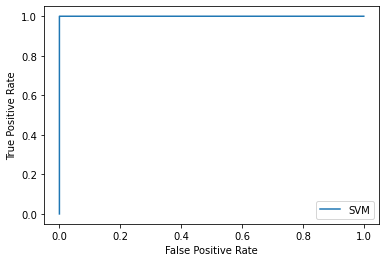

Logistic: ROC AUC=1.000


In [32]:
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('Logistic: ROC AUC=%.3f' % (svm_auc_score))